## Addressing the Earth's Surface using Discrete Global Grid Systems.

In this notebook we will explore Discrete Global Grid Systems as a base for addressing the surface of the Earth. This differs substantially from cartesian coordinates in several significant ways.

1. DGGS cells are addressed using a single string as opposed to coordinate pairs
2. The cells used for this purpose are triangular in shape, not square.
3. Cells are equal area and not subject to distortion created by cartesian coordinate systems on a spherical surface. 

### Concept

The initial concept behind this addressing system uses equilateral triangles. Lets create one now.

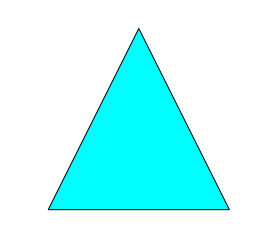

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import string
import sys

sys.path.append(r'/Users/clint/code/github.com/data-navigator/dggs-package/DGGS/cell')
from triangle import Triangle

t = Triangle('00', [[0,0],[0.5,1],[1,0]], 'cyan')
fig0 = plt.figure() 
ax0 = fig0.add_subplot(111, aspect='equal') 
ax0.add_patch(t.patch) 
ax0.set_xlim((-0.1,1.1)) 
ax0.set_ylim((-0.1,1.1)) 
plt.axis('off')
plt.show()

We can tessellate the triangle to form the net of an icosahedron. For the purpose of addressing, lets split the icosahedral net into 5 groups of 4, these groups are made up of each diagonal set of 4 A-D, E-H, I-L, M-P and Q-T. They are shown in different colors below:

In [59]:
import itertools
import string

triangles = (
    ((0,0),(0.5,1),(1,0)),
    ((0,0),(0.5,-1),(1,0)),
    ((0.5,-1),(1.5,-1),(1,0)),
    ((0.5,-1),(1,-2),(1.5,-1)),
    ((1,0),(1.5,1),(2,0)),
    ((1,0),(1.5,-1),(2,0)),
    ((1.5,-1),(2.5,-1),(2,0)),
    ((1.5,-1),(2,-2),(2.5,-1)),
    ((2,0),(2.5,1),(3,0)),
    ((2,0),(2.5,-1),(3,0)),
    ((2.5,-1),(3.5,-1),(3,0)),
    ((2.5,-1),(3,-2),(3.5,-1)),
    ((3,0),(3.5,1),(4,0)),
    ((3,0),(3.5,-1),(4,0)),
    ((3.5,-1),(4.5,-1),(4,0)),
    ((3.5,-1),(4,-2),(4.5,-1)),
    ((4,0),(4.5,1),(5,0)),
    ((4,0),(4.5,-1),(5,0)),
    ((4.5,-1),(5.5,-1),(5,0)),
    ((4.5,-1),(5,-2),(5.5,-1)),
)

print(set(itertools.chain(*triangles)))

fig1 = plt.figure() 
ax1 = fig1.add_subplot(111, aspect='equal') 
ax1.set_xlim((-0.1,5.6)) 
ax1.set_ylim((-2.1,1.1)) 

address = string.ascii_uppercase

def _color(a):
    colors = ('Cyan', 'Blue', 'Green', 'Yellow', 'Orange')
    groups = (('A', 'B', 'C', 'D'),
              ('E', 'F', 'G', 'H'),
              ('I', 'J', 'K', 'L'),
              ('M', 'N', 'O', 'P'),
              ('Q', 'R', 'S', 'T'))
    for i, group in enumerate(groups):
        if a[0] in group:
            return colors(i)

def _triangle(index, vertices):
    color = _color(address[index])
    a = str(index) if index > 9 else '0' + str(index)
    return Triangle(a + '-', vertices, color)

def _triangles(tri_enum, group=False):
    yield from (_triangle(i, t) for i, t in tri_enum)
    
icosahedral_net = _triangles(enumerate(triangles))

for triangle in icosahedral_net:
    ax1.add_patch(triangle.patch)

plt.axis('off')
plt.show()

{(3, 0), (2.5, 1), (1, -2), (4.5, -1), (4, -2), (1.5, -1), (4, 0), (5, 0), (4.5, 1), (1.5, 1), (5.5, -1), (5, -2), (0, 0), (2.5, -1), (2, -2), (1, 0), (0.5, 1), (3.5, 1), (3.5, -1), (3, -2), (2, 0), (0.5, -1)}


TypeError: 'tuple' object is not callable

Each strip is 108 degrees wide and 180 degrees high. They each overlap 36 degrees on either side with the next, or previous group. This grouping will form the basis of our addressing system. There are 4 triangles per group, if each triangle tessellates into 4 smaller triangles, the groups become heirarchical quad trees. Meanwhile, we can use further grouping in 'strips' as the triangles tessellate. We will have to update the coloring to illustrate this.

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


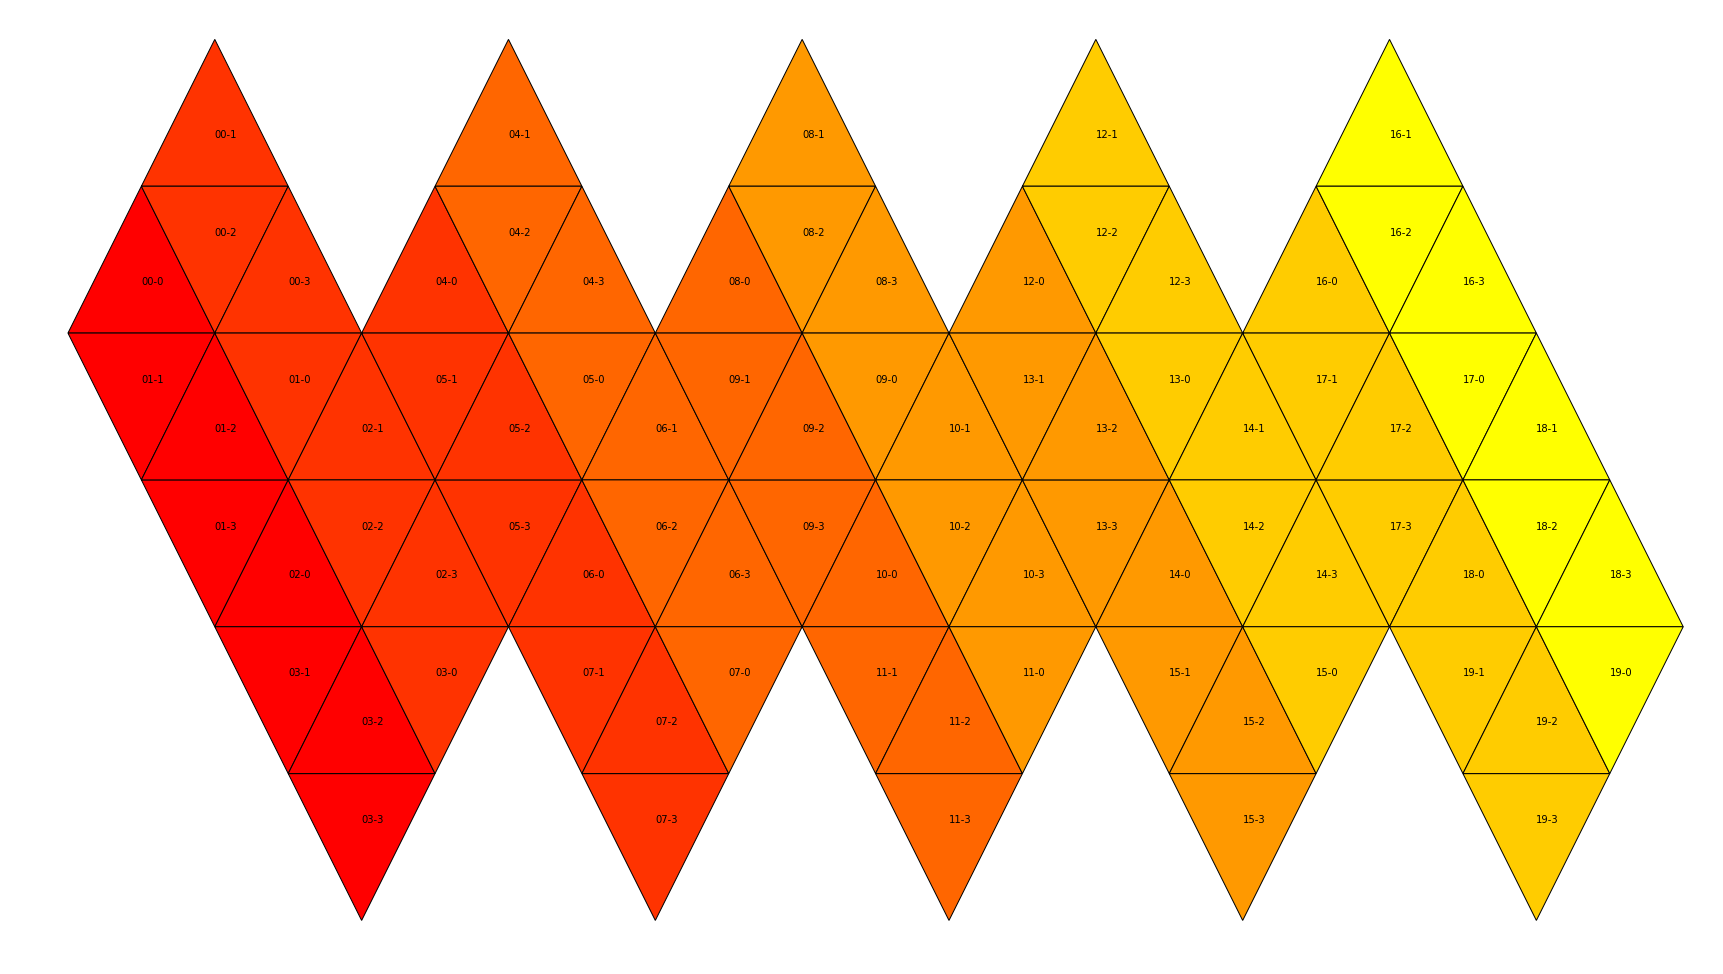

In [49]:
import itertools

from colour import Color

fig2 = plt.figure(figsize=(30,30)) 
ax2 = fig2.add_subplot(111, aspect='equal') 
ax2.set_xlim((-0.1,5.6)) 
ax2.set_ylim((-2.1,1.1)) 

icosahedral_net = list(_triangles(enumerate(vertices)))
subdivisions = 1
number_of_groups = subdivisions * 10 if subdivisions > 0 else 5
red = Color('red')
yellow = Color('yellow')
r1 = red.range_to(yellow, int(number_of_groups / 2 + 1))
r2 = yellow.range_to(red, int(number_of_groups / 2 + 1))
next(r2)
colors = list(itertools.chain(r1, r2))
color1 = colors.pop().get_rgb()
color2 = colors.pop().get_rgb()
_primary_groups = [set(range(i, i + 4)) for i in range(0, 20, 4)]

def _color2(address):
    coordinates = address.split('-')
    for i, group in enumerate(_primary_groups):
        print(i)
        if int(coordinates[0]) in group:
            if len(coordinates) == 1:
                return next(colors).get_rgb()
            else:
                if int(coordinates[0]) % 2 == 0:
                    # not inverted
                    for digit in coordinates[1]:
                        if digit == '0':
                            return color1
                        else:
                            return color2
                else:
                    # inverted
                    for digit in coordinates[1]:
                        if digit == '0':
                            return color2
                        else:
                            return color1
            
for triangle in icosahedral_net:
    if subdivisions > 0:
        tiles = triangle.tessellate(subdivisions)
    else:
        tiles = [triangle]
    for tile in tiles:
        tile.patch_color = _color2(tile.address)
        ax2.add_patch(tile.patch)
        ax2.annotate(tile.address, xy=tile.centroid)

plt.axis('off')
plt.show()